In [1]:
import numpy as np
import pandas as pd

encode_fantom_df = pd.DataFrame.from_csv('/Users/manuel/development/thesis/overlap/filtered_hg19DNase_H3K27ac_FANTOM_overlapped.csv', sep="\t")
encode_fantom_df.reset_index(level=0, inplace=True)

In [15]:
encode_fantom_df.T

,0,1,2,3,4,5,6,7,8,9,...,1801771,1801772,1801773,1801774,1801775,1801776,1801777,1801778,1801779,1801780
chrom,chr3,chr1,chr15,chr5,chr11,chr5,chr10,chr10,chr3,chr8,...,chr16,chr1,chr6,chr19,chr7,chr18,chr1,chr5,chr6,chr17
start,152855118,214611302,101260386,52654619,9586536,148864272,3892558,5624645,5062817,126230865,...,58528640,60138160,105771787,8428130,24613000,20807015,150485494,178450920,155442359,37309960
end,152861069,214622352,101269291,52660930,9592486,148869801,3895911,5628826,5068862,126234434,...,58529655,60139325,105773337,8429430,24613150,20808529,150486475,178451070,155443585,37310110
name,ENCODE.3.ENCFF778PVS.0,ENCODE.3.ENCFF778PVS.1,ENCODE.3.ENCFF778PVS.2,ENCODE.3.ENCFF778PVS.3,ENCODE.3.ENCFF778PVS.4,ENCODE.3.ENCFF778PVS.5,ENCODE.3.ENCFF778PVS.6,ENCODE.3.ENCFF778PVS.7,ENCODE.3.ENCFF778PVS.8,ENCODE.3.ENCFF778PVS.9,...,ENCODE.3.ENCFF026HMJ.33999,ENCODE.3.ENCFF026HMJ.34000,ENCODE.3.ENCFF026HMJ.34001,ENCODE.3.ENCFF026HMJ.34002,ENCODE.3.ENCFF026HMJ.34003,ENCODE.3.ENCFF026HMJ.34004,ENCODE.3.ENCFF026HMJ.34005,ENCODE.3.ENCFF026HMJ.34006,ENCODE.3.ENCFF026HMJ.34007,ENCODE.3.ENCFF026HMJ.34008
score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
strand,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
size,5951,11050,8905,6311,5950,5529,3353,4181,6045,3569,...,1015,1165,1550,1300,150,1514,981,150,1226,150
method,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,...,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac
description,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...
assembly,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,...,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19


In [2]:
encode_fantom_df[['FA_size', 'FA_ovlp_len', 'FA_ovlp_pct']].describe()

,FA_size,FA_ovlp_len,FA_ovlp_pct
count,1.801781e+06,1.801781e+06,1.801781e+06
mean,4.735484e+01,3.952389e+01,4.582093e+00
std,1.477957e+02,1.292502e+02,1.652188e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,2.860000e+03,2.860000e+03,1.000000e+02


In [3]:
# filter only valid overlaps
df = encode_fantom_df.query("FA_ovlp_pct > 0")

In [4]:
print("Valid overlaps:", len(df), "on", len(encode_fantom_df), " Ratio:", len(df)/len(encode_fantom_df)) 

Valid overlaps: 212041 on 1801781  Ratio: 0.11768411366309224


In [5]:
df[['FA_size', 'FA_ovlp_len', 'FA_ovlp_pct']].describe()

,FA_size,FA_ovlp_len,FA_ovlp_pct
count,212041.000000,212041.000000,212041.000000
mean,402.389387,335.847327,38.935524
std,206.760548,205.994536,31.336400
min,15.000000,15.000000,10.000000
25%,273.000000,150.000000,15.332266
50%,368.000000,309.000000,24.464061
75%,474.000000,426.000000,52.891566
max,2860.000000,2860.000000,100.000000


In [6]:
df.corr()

,start,end,score,size,FA_start,FA_end,FA_score,FA_size,FA_ovlp_len,FA_ovlp_pct
start,1.000000,1.000000,NaN,0.012405,1.000000,1.000000,0.004837,0.004097,0.009359,-0.007741
end,1.000000,1.000000,NaN,0.012427,1.000000,1.000000,0.004840,0.004105,0.009374,-0.007756
score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,0.012405,0.012427,NaN,1.000000,0.012415,0.012417,0.134370,0.365432,0.656276,-0.669150
FA_start,1.000000,1.000000,NaN,0.012415,1.000000,1.000000,0.004837,0.004099,0.009365,-0.007749
FA_end,1.000000,1.000000,NaN,0.012417,1.000000,1.000000,0.004839,0.004103,0.009368,-0.007748
FA_score,0.004837,0.004840,NaN,0.134370,0.004837,0.004839,1.000000,0.379368,0.312687,0.036999
FA_size,0.004097,0.004105,NaN,0.365432,0.004099,0.004103,0.379368,1.000000,0.764330,0.103771
FA_ovlp_len,0.009359,0.009374,NaN,0.656276,0.009365,0.009368,0.312687,0.764330,1.000000,-0.295263
FA_ovlp_pct,-0.007741,-0.007756,NaN,-0.669150,-0.007749,-0.007748,0.036999,0.103771,-0.295263,1.000000


In [7]:
df_ovlp = df[['FA_ovlp_len', 'FA_ovlp_pct']]

In [6]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default' # Sets the plotting display theme to ggplot2
plt.show(df_ovlp.plot(kind = 'box'))

NameError: name 'pd' is not defined

/Users/manuel/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


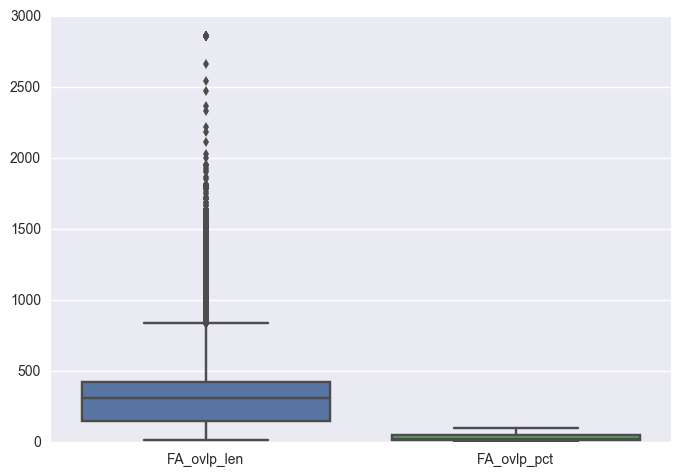

In [9]:
# Import the seaborn library
import seaborn as sns

# Do the boxplot
plt.show(sns.boxplot(df_ovlp))

In [10]:
encode_fantom_df.columns[0:16]

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims'],
      dtype='object')

In [11]:
# extract encode only data
df_encode_only = encode_fantom_df[['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_encode_only = df_encode_only.drop_duplicates(subset='name')

df_encode_only.T

,0,1,2,3,4,5,6,7,8,9,...,1801771,1801772,1801773,1801774,1801775,1801776,1801777,1801778,1801779,1801780
chrom,chr3,chr1,chr15,chr5,chr11,chr5,chr10,chr10,chr3,chr8,...,chr16,chr1,chr6,chr19,chr7,chr18,chr1,chr5,chr6,chr17
start,152855118,214611302,101260386,52654619,9586536,148864272,3892558,5624645,5062817,126230865,...,58528640,60138160,105771787,8428130,24613000,20807015,150485494,178450920,155442359,37309960
end,152861069,214622352,101269291,52660930,9592486,148869801,3895911,5628826,5068862,126234434,...,58529655,60139325,105773337,8429430,24613150,20808529,150486475,178451070,155443585,37310110
name,ENCODE.3.ENCFF778PVS.0,ENCODE.3.ENCFF778PVS.1,ENCODE.3.ENCFF778PVS.2,ENCODE.3.ENCFF778PVS.3,ENCODE.3.ENCFF778PVS.4,ENCODE.3.ENCFF778PVS.5,ENCODE.3.ENCFF778PVS.6,ENCODE.3.ENCFF778PVS.7,ENCODE.3.ENCFF778PVS.8,ENCODE.3.ENCFF778PVS.9,...,ENCODE.3.ENCFF026HMJ.33999,ENCODE.3.ENCFF026HMJ.34000,ENCODE.3.ENCFF026HMJ.34001,ENCODE.3.ENCFF026HMJ.34002,ENCODE.3.ENCFF026HMJ.34003,ENCODE.3.ENCFF026HMJ.34004,ENCODE.3.ENCFF026HMJ.34005,ENCODE.3.ENCFF026HMJ.34006,ENCODE.3.ENCFF026HMJ.34007,ENCODE.3.ENCFF026HMJ.34008
score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
strand,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
size,5951,11050,8905,6311,5950,5529,3353,4181,6045,3569,...,1015,1165,1550,1300,150,1514,981,150,1226,150
method,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,...,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac
description,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...
assembly,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,...,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19


In [12]:
df_encode_only.describe()

,start,end,score,size
count,1.785580e+06,1.785580e+06,1785580.0,1.785580e+06
mean,7.477412e+07,7.477543e+07,1.0,1.312961e+03
std,5.497006e+07,5.497009e+07,0.0,1.489315e+03
min,5.840000e+03,6.742000e+03,1.0,1.500000e+02
25%,3.210305e+07,3.210403e+07,1.0,1.500000e+02
50%,6.249251e+07,6.249402e+07,1.0,1.038000e+03
75%,1.107071e+08,1.107081e+08,1.0,1.815000e+03
max,2.492398e+08,2.492404e+08,1.0,9.282900e+04


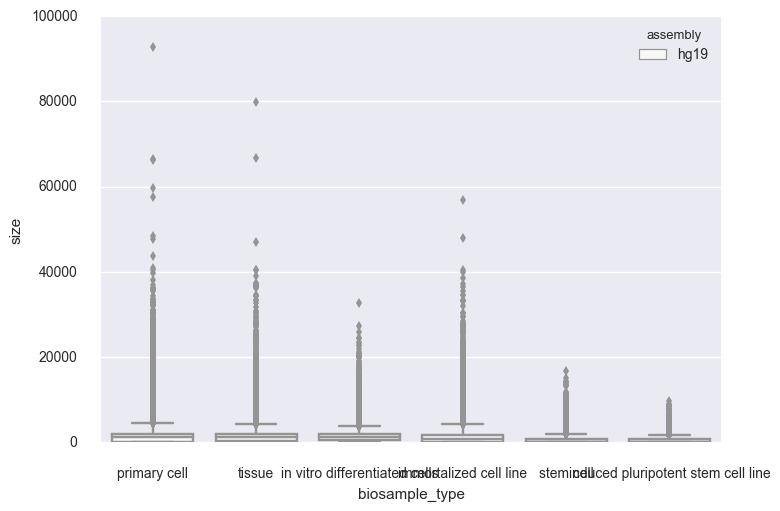

In [13]:
sns.boxplot(x="biosample_type", y="size", hue="assembly", data=df_encode_only, palette="PRGn")
sns.despine(offset=10, trim=True)

In [14]:
df_encode_only.sort_values(by='chrom', inplace=True)

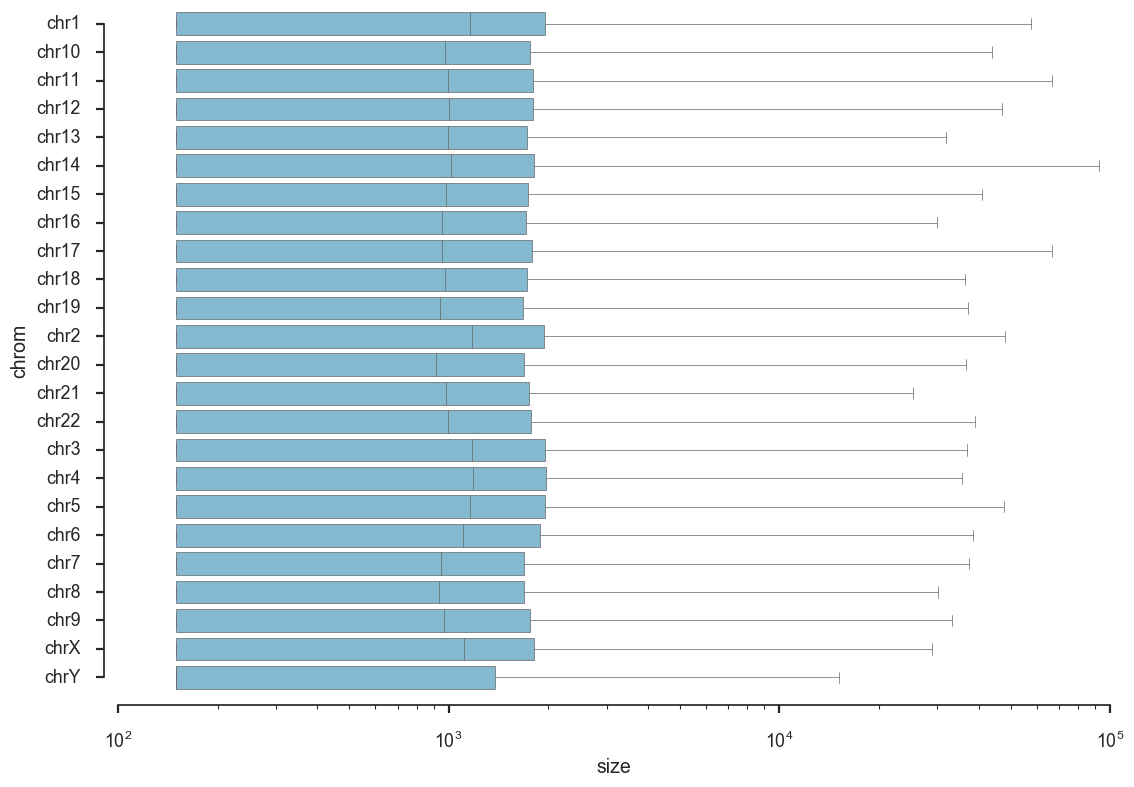

In [15]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="size", y="chrom", data=df_encode_only,
                 whis=np.inf, color="c")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [16]:
df_encode_only.sort_values(by='biosample_term_name', inplace=True)

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2056: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2057: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2070: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2077: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


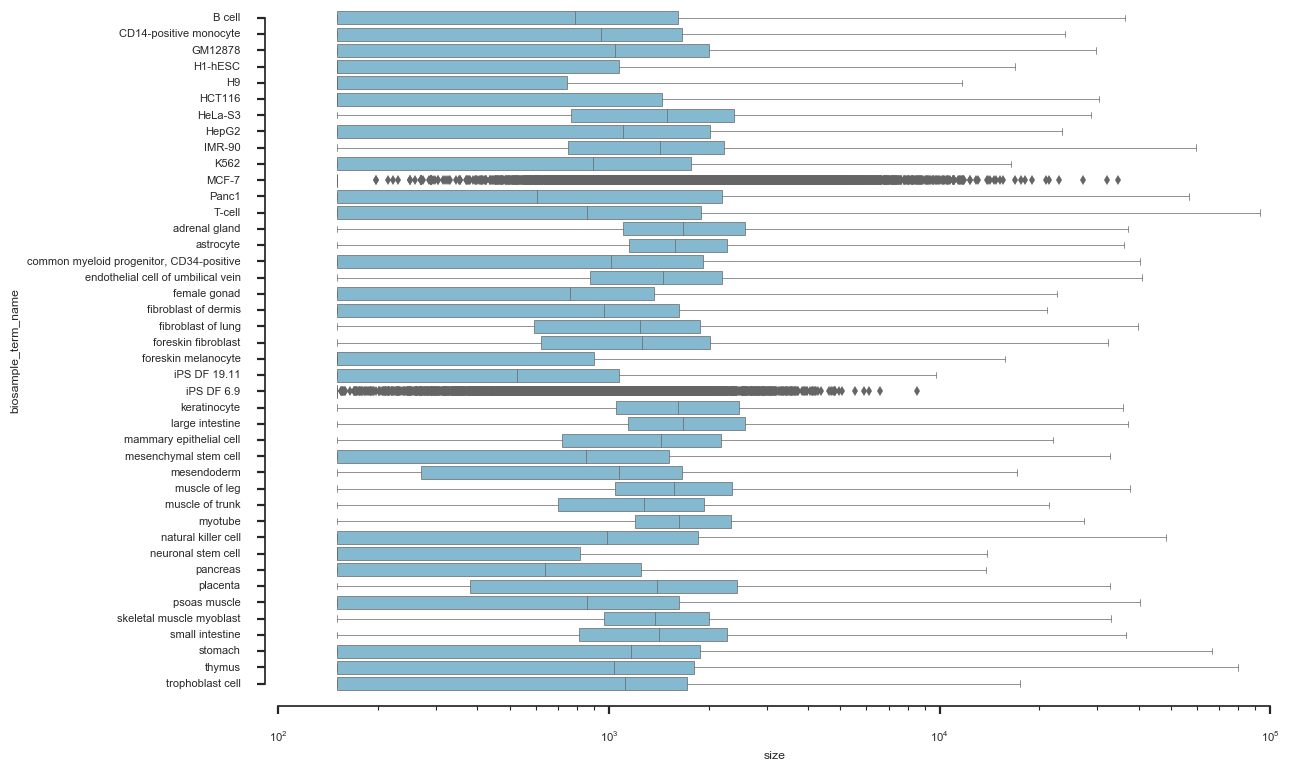

In [17]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="size", y="biosample_term_name", data=df_encode_only,
                 whis=np.inf, color="c")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

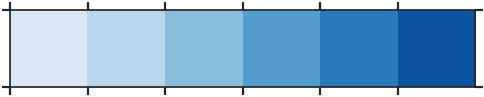

In [18]:
sns.palplot(sns.color_palette("Blues"))

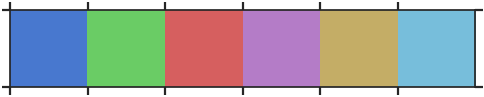

In [19]:
sns.palplot(sns.color_palette("muted"))

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


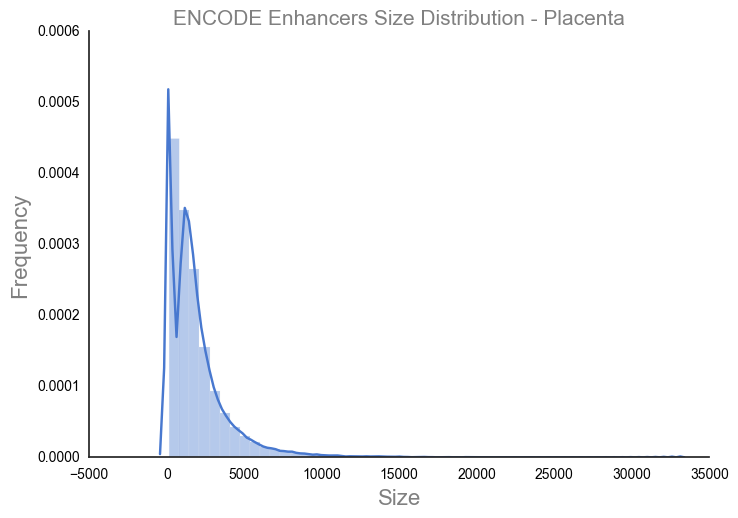

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")
g.axes.set_title('ENCODE Enhancers Size Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

In [21]:
df_encode_only = encode_fantom_df[['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_encode_only = df_encode_only.drop_duplicates(subset='name')
df_fantom_only = encode_fantom_df.drop_duplicates(subset='name')

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


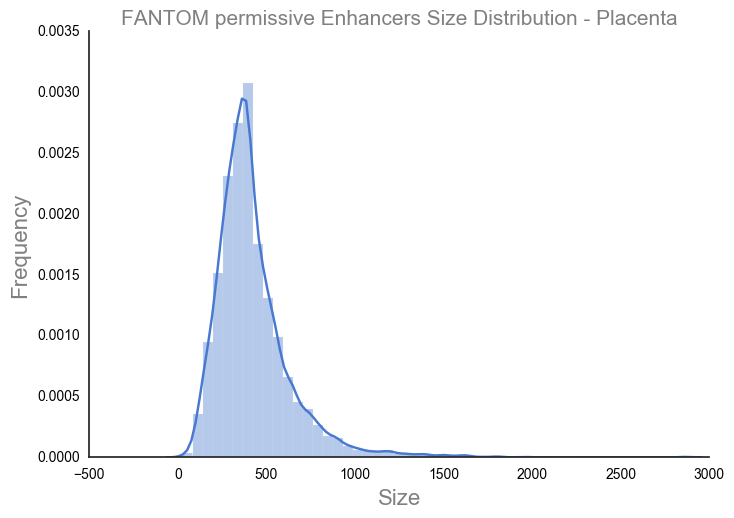

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = encode_fantom_df.query('biosample_term_name == "placenta" & FA_size > 0')[['FA_size']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")
g.axes.set_title('FANTOM permissive Enhancers Size Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

In [23]:
data = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
data.describe()

,size
count,38389.000000
mean,1879.675949
std,2038.726097
min,150.000000
25%,380.000000
50%,1397.000000
75%,2439.000000
max,32806.000000


In [24]:
np.logspace(0,100, 1000)

array([  1.00000000e+000,   1.25921561e+000,   1.58562396e+000,
         1.99664245e+000,   2.51420335e+000,   3.16592411e+000,
         3.98658107e+000,   5.01996513e+000,   6.32121848e+000,
         7.95977700e+000,   1.00230755e+001,   1.26212131e+001,
         1.58928287e+001,   2.00124980e+001,   2.52000499e+001,
         3.17322963e+001,   3.99578030e+001,   5.03154895e+001,
         6.33580499e+001,   7.97814457e+001,   1.00462042e+002,
         1.26503372e+002,   1.59295021e+002,   2.00586778e+002,
         2.52582003e+002,   3.18055202e+002,   4.00500076e+002,
         5.04315949e+002,   6.35042517e+002,   7.99655453e+002,
         1.00693863e+003,   1.26795285e+003,   1.59662602e+003,
         2.01049642e+003,   2.53164848e+003,   3.18789129e+003,
         4.01424249e+003,   5.05479682e+003,   6.36507908e+003,
         8.01500696e+003,   1.00926219e+004,   1.27087871e+004,
         1.60031031e+004,   2.01513573e+004,   2.53749038e+004,
         3.19524751e+004,   4.02350555e+

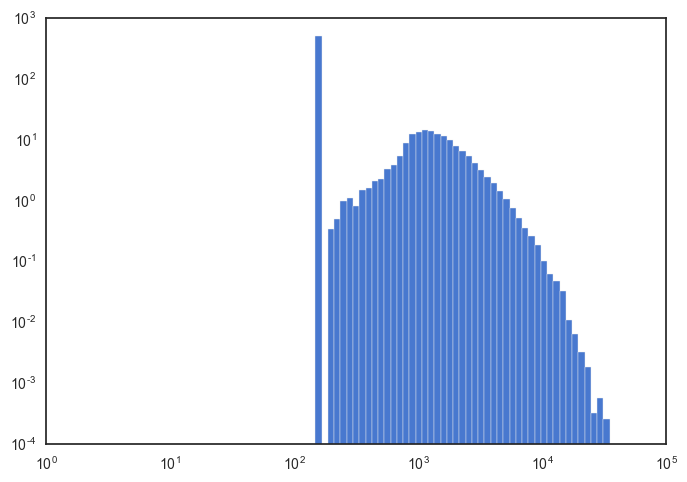

In [25]:
import numpy as np
from matplotlib import pyplot as plt

# something random to plot
#data = (np.random.random(10000)*10)**3
data = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
# log-scaled bins
bins = np.logspace(0, 5, 100)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

In [26]:
encode_fantom_df.describe()

,start,end,score,size,FA_start,FA_end,FA_score,FA_size,FA_ovlp_len,FA_ovlp_pct
count,1.801781e+06,1.801781e+06,1801781.0,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06
mean,7.480117e+07,7.480249e+07,1.0,1.321550e+03,8.959037e+06,8.959085e+06,1.660282e+01,4.735484e+01,3.952389e+01,4.582093e+00
std,5.501282e+07,5.501285e+07,0.0,1.489428e+03,3.147939e+07,3.147950e+07,1.450117e+02,1.477957e+02,1.292502e+02,1.652188e+01
min,5.840000e+03,6.742000e+03,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.211176e+07,3.211347e+07,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.250488e+07,6.250626e+07,1.0,1.048000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.107457e+08,1.107458e+08,1.0,1.828000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.492398e+08,2.492404e+08,1.0,9.282900e+04,2.491573e+08,2.491577e+08,8.368000e+03,2.860000e+03,2.860000e+03,1.000000e+02


In [15]:
encode_fantom_df.describe()

,start,end,score,size,FA_start,FA_end,FA_score,FA_size,FA_ovlp_len,FA_ovlp_pct
count,1.801781e+06,1.801781e+06,1801781.0,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06
mean,7.480117e+07,7.480249e+07,1.0,1.321550e+03,8.959037e+06,8.959085e+06,1.660282e+01,4.735484e+01,3.952389e+01,4.582093e+00
std,5.501282e+07,5.501285e+07,0.0,1.489428e+03,3.147939e+07,3.147950e+07,1.450117e+02,1.477957e+02,1.292502e+02,1.652188e+01
min,5.840000e+03,6.742000e+03,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.211176e+07,3.211347e+07,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.250488e+07,6.250626e+07,1.0,1.048000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.107457e+08,1.107458e+08,1.0,1.828000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.492398e+08,2.492404e+08,1.0,9.282900e+04,2.491573e+08,2.491577e+08,8.368000e+03,2.860000e+03,2.860000e+03,1.000000e+02


In [63]:
#grouped = encode_fantom_df[['FA_name', 'biosample_term_name']].groupby(['FA_name']).agg(['count'])
encode_fantom_df_ovlp = encode_fantom_df.query("FA_name != '.' & FA_score > 1000")
pivot = pd.pivot_table(encode_fantom_df_ovlp,index=["chrom"], values=["name"], columns=["biosample_term_name"],aggfunc=[len])

encode_fantom_df_scores = encode_fantom_df.query("FA_name != '.'")
pivot_scores = pd.pivot_table(encode_fantom_df_scores,
                              index=["biosample_term_name"], 
                              values=["FA_score"], columns=["chrom"],aggfunc=[np.sum])

pivot_ovlp_sizes = pd.pivot_table(encode_fantom_df_scores,
                              index=["biosample_term_name"], 
                              values=["FA_ovlp_pct"], columns=["chrom"],aggfunc=[np.mean])

In [60]:
encode_fantom_df_ovlp.size

155898

In [65]:
pivot = pivot.fillna(0)
pivot_scores = pivot_scores.fillna(0)
pivot_ovlp_sizes = pivot_ovlp_sizes.fillna(0)

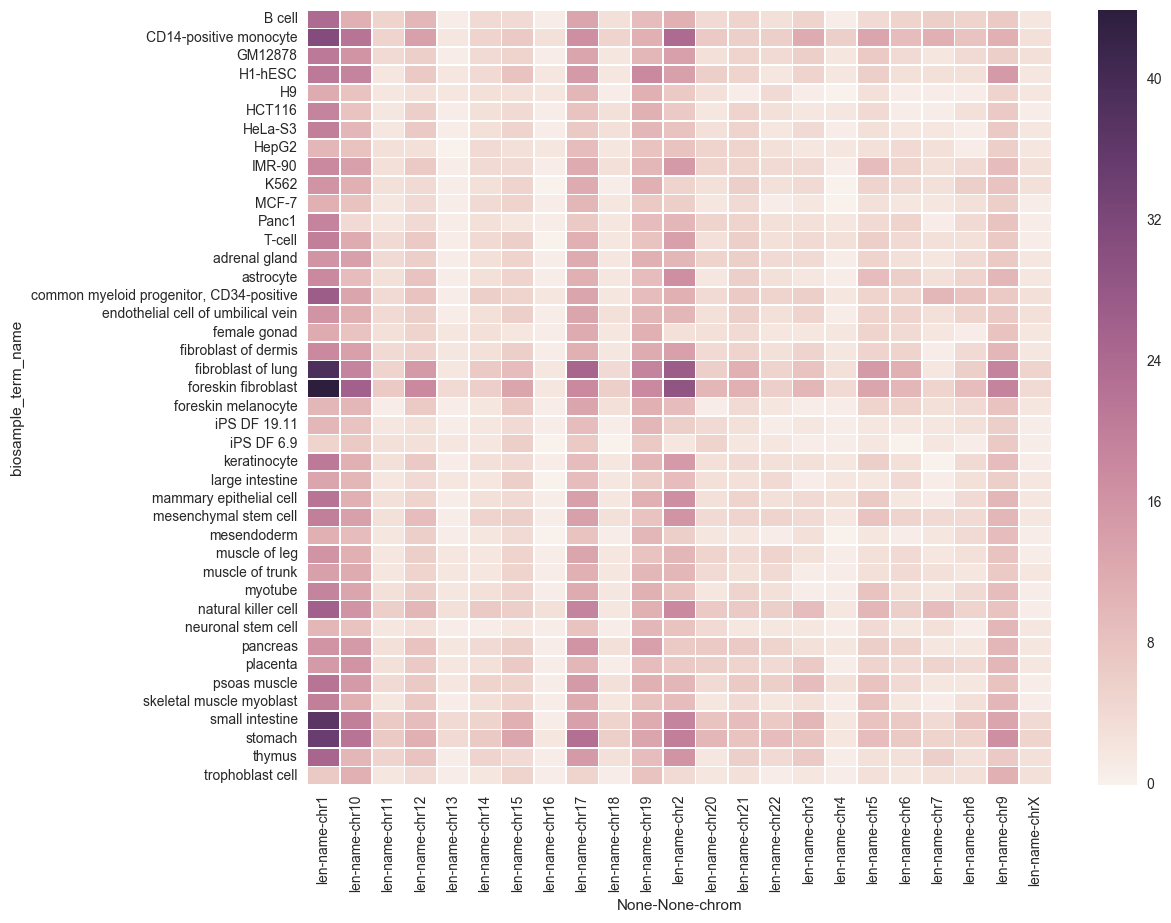

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot, annot=False, linewidths=.5, ax=ax)


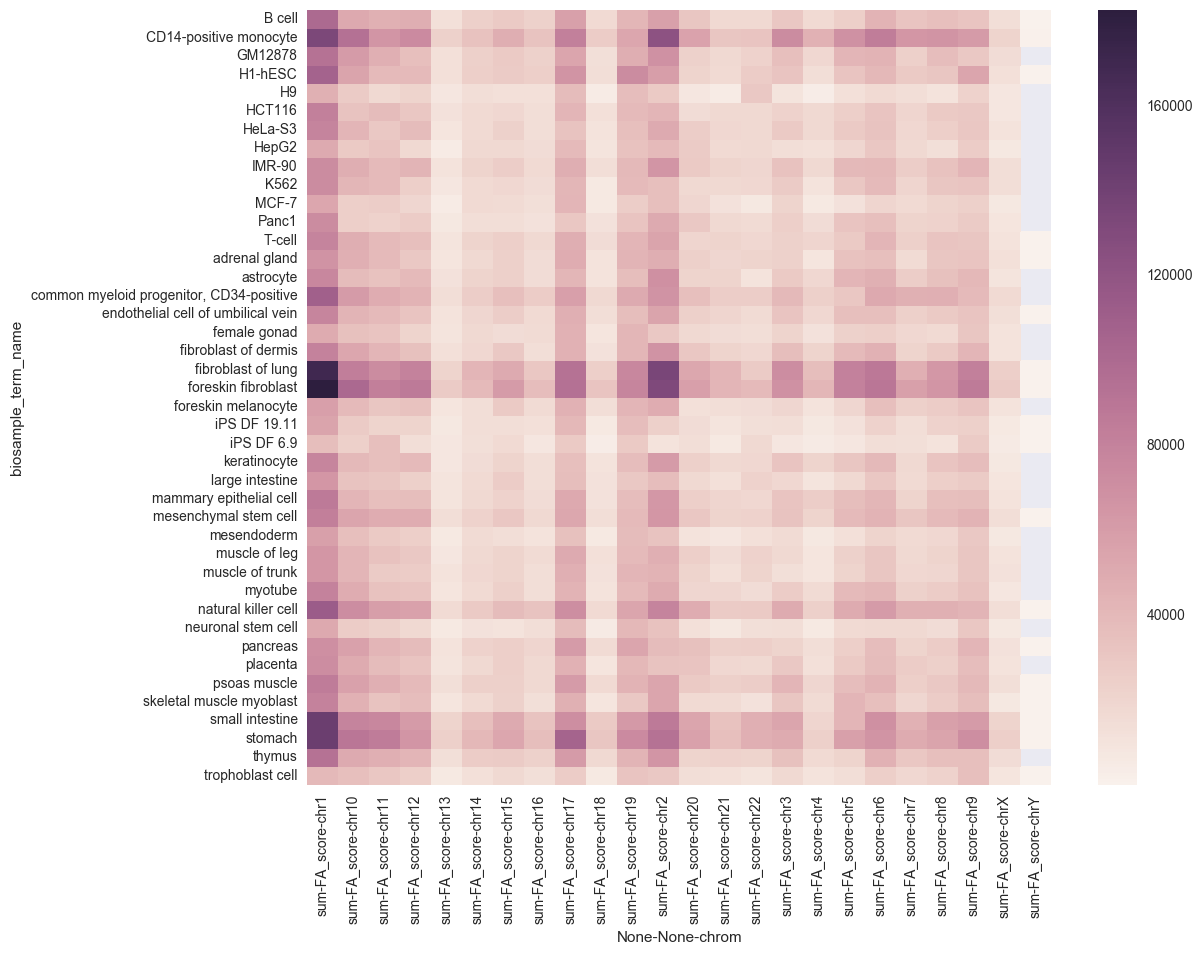

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_scores, annot=False, linewidths=0, ax=ax)

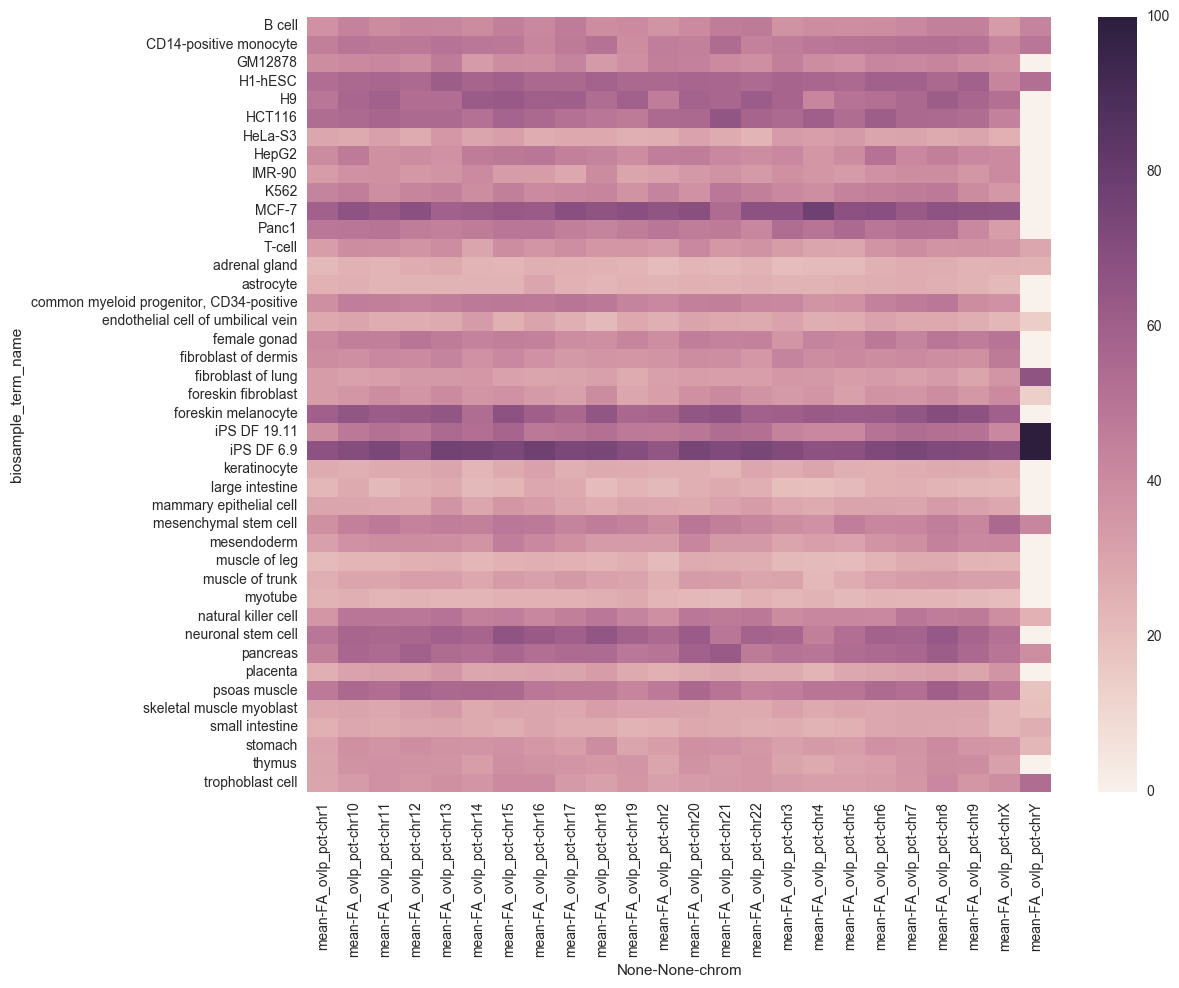

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_ovlp_sizes, annot=False, linewidths=0, ax=ax)

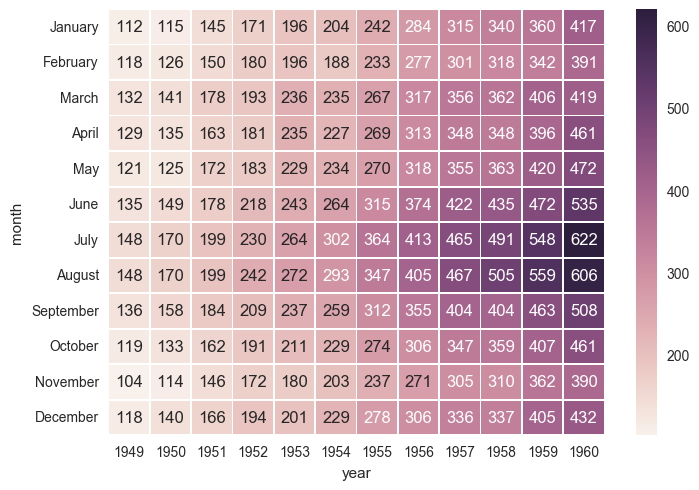

In [9]:
%matplotlib inline
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

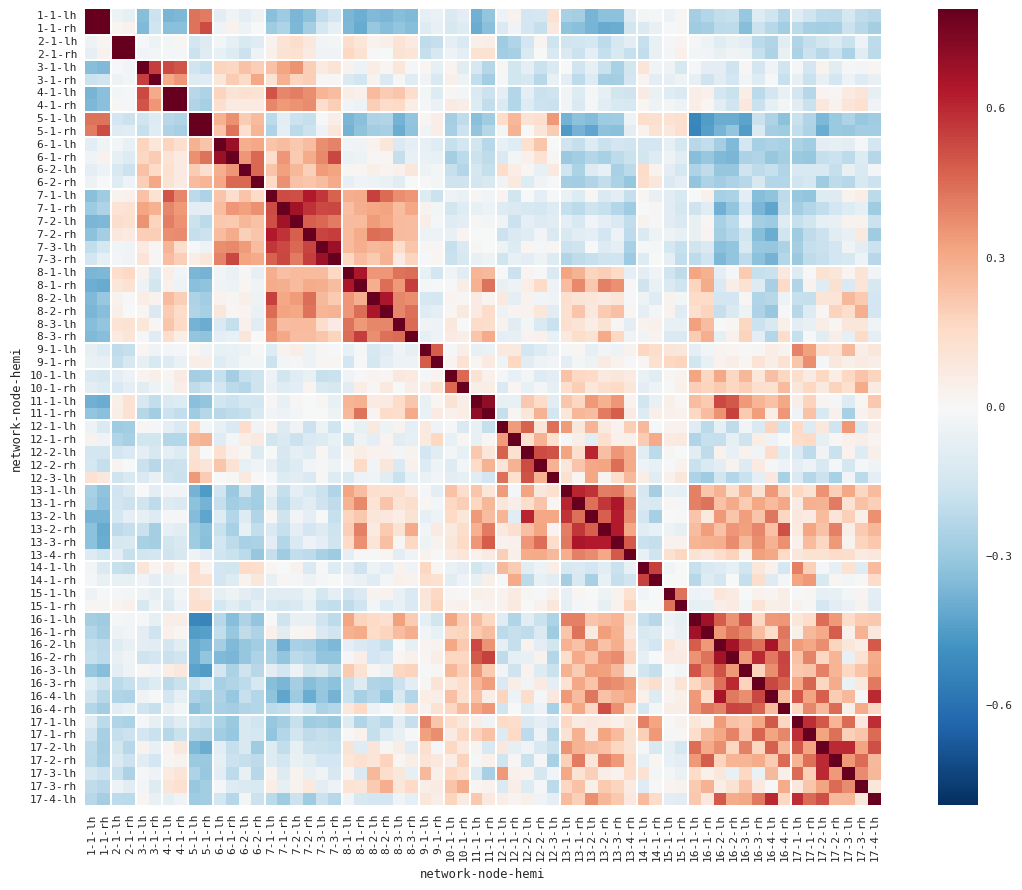

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()